### INA Project - Passing influence on a football game outcome

Project for Course INA: (Introduction to) Network Analysis at UL FRI 2022/2023

Students:
* Aleksandar Georgiev
* Luka Pavićević
* Dragan Majkić

In [32]:
# Standard Libraries
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# StatsBombPy
from statsbombpy import sb

# For Pitch
from mplsoccer.pitch import Pitch

# Disable Warnings for statsbombpy and No Auth Warning
import warnings
warnings.filterwarnings("ignore")

# Load helper functions
from helper_functions_barcelona import plot_passes_for_player, get_players_names, get_match_passes_by_team, create_graph

# Networkx
import networkx as nx

In [2]:
# Install statsbombpy and mplsoccer libraries

#!pip install statsbombpy
#!pip install mplsoccer
#!pip install networkx

#### Data Preparation

In [3]:
# Available seasons for La Liga Competition

comp = sb.competitions()
la_liga_comp = comp[comp['competition_name'] == 'La Liga']
la_liga_comp[:3]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
21,11,90,Spain,La Liga,male,False,False,2020/2021,2022-12-05T14:39:07.366723,2023-04-28T08:23:01.474542,2023-04-28T08:23:01.474542,2022-12-05T14:39:07.366723
22,11,42,Spain,La Liga,male,False,False,2019/2020,2023-04-19T10:52:22.240135,2021-06-13T16:17:31.694,None,2023-04-19T10:52:22.240135
23,11,4,Spain,La Liga,male,False,False,2018/2019,2023-05-11T08:22:01.941875,2021-07-09T14:53:22.103024,None,2023-05-11T08:22:01.941875


In [4]:
# Find matches for Barcelona and Real Madrid

team1, team2 = 'Real Madrid', 'Barcelona'
season = '2020/2021'
matches = sb.matches(competition_id=11, season_id=90)   # More seasons: 42, 1, 2, 4
matches = matches[(matches['home_team'].isin([team1, team2])) & (matches['away_team'].isin([team1, team2]))]
matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
3,3773497,2021-04-10,21:00:00.000,Spain - La Liga,2020/2021,Real Madrid,Barcelona,2,1,available,...,2023-04-28T01:35:16.051381,30,Regular Season,Estadio Alfredo Di Stéfano,Jesús Gil Manzano,Zinédine Zidane,Ronald Koeman,1.1.0,2,2
7,3773585,2020-10-24,16:00:00.000,Spain - La Liga,2020/2021,Barcelona,Real Madrid,1,3,available,...,2022-08-04T12:00,7,Regular Season,Spotify Camp Nou,Juan Martínez Munuera,Ronald Koeman,Zinédine Zidane,1.1.0,2,2


In [5]:
# Find matches and extract informations about passes

match1_events = sb.events(match_id=3773497)
match2_events = sb.events(match_id=3773585)

match1_passes = match1_events[['team', 'type', 'minute', 'second', 'location', 'pass_end_location', 'pass_outcome', 'player']]
match2_passes = match2_events[['team', 'type', 'minute', 'second', 'location', 'pass_end_location', 'pass_outcome', 'player']]

#### Passes Plots

In [6]:
# Get player names and jersey numbers

players_team1 = get_players_names(match1_events, team1, team_position = 0)
players_team2 = get_players_names(match1_events, team2, team_position = 1)

print(f'Team 1 - {team1} players: {players_team1}')
print(f'Team 2 - {team2} players: {players_team2}')

Team 1 - Real Madrid players: {'Thibaut Courtois': '1', 'Lucas Vázquez Iglesias': '17', 'Éder Gabriel Militão': '3', 'José Ignacio Fernández Iglesias': '6', 'Ferland Mendy': '23', 'Carlos Henrique Casimiro': '14', 'Federico Santiago Valverde Dipetta': '15', 'Luka Modrić': '10', 'Toni Kroos': '8', 'Vinícius José Paixão de Oliveira Júnior': '20', 'Karim Benzema': '9'}
Team 2 - Barcelona players: {'Marc-André ter Stegen': '1', 'Óscar Mingueza García': '28', 'Ronald Federico Araújo da Silva': '4', 'Clément Lenglet': '15', 'Sergino Dest': '2', 'Jordi Alba Ramos': '18', 'Sergio Busquets i Burgos': '5', 'Frenkie de Jong': '21', 'Lionel Andrés Messi Cuccittini': '10', 'Pedro González López': '16', 'Ousmane Dembélé': '11'}


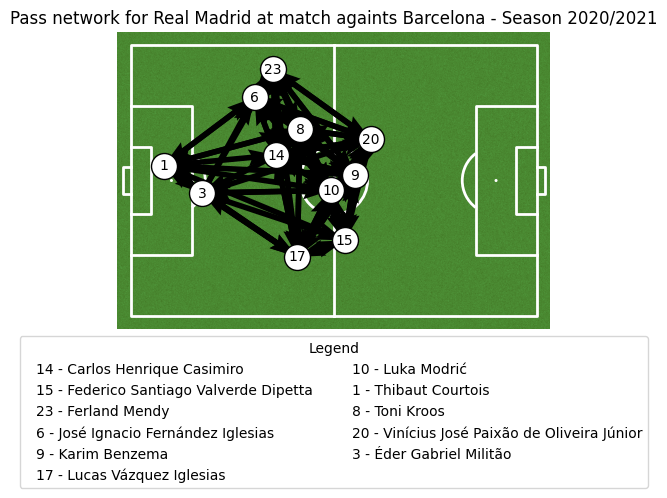

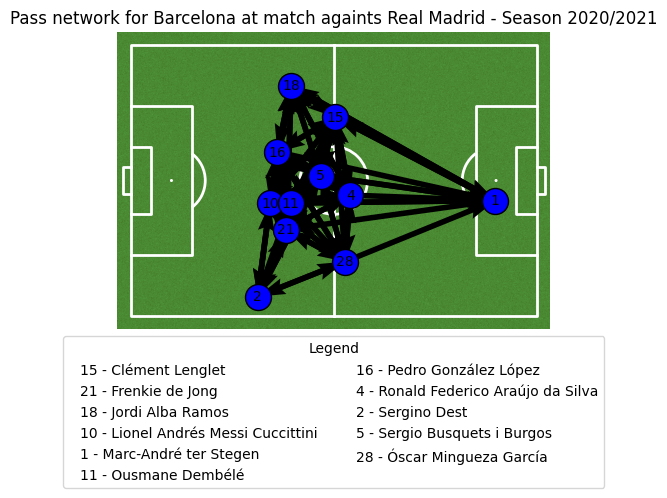

In [23]:
# First match - Both teams

# First team
players = get_players_names(match1_events, team1, team_position = 0)
passes_team1_match1 = get_match_passes_by_team(match1_passes, team1, players, team2, season, team_position = 0)

# Second team
players = get_players_names(match1_events, team2, team_position = 1)
passes_team2_match1 = get_match_passes_by_team(match1_passes, team2, players, team1, season, team_position = 1)

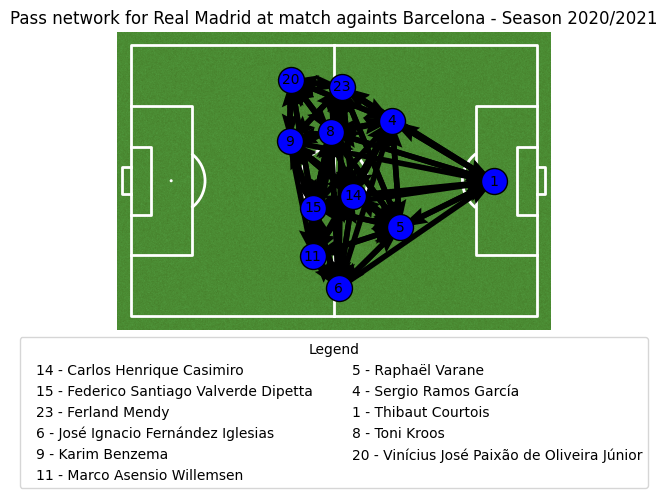

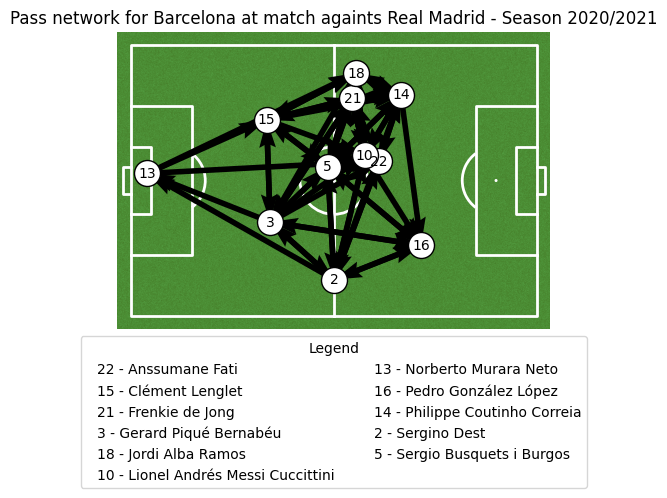

In [24]:
# Second match - Both teams

# First team
players = get_players_names(match2_events, team1, team_position = 1)
passes_team1_match2 = get_match_passes_by_team(match2_passes, team1, players, team2, season, team_position = 1)

# Second team
players = get_players_names(match2_events, team2, team_position = 0)
passes_team2_match2 = get_match_passes_by_team(match2_passes, team2, players, team1, season, team_position = 0)

Passes for player: Lionel Andrés Messi Cuccittini
Different passes: [nan 'Incomplete' 'Unknown']
pass_outcome
Successful    85.714286
Incomplete    11.428571
Unknown        2.857143
Name: proportion, dtype: float64


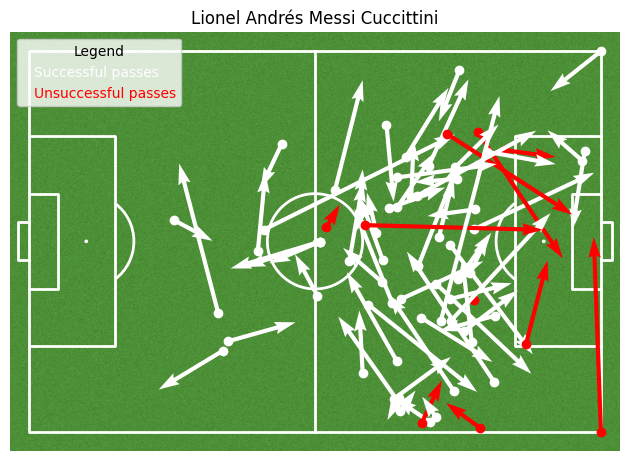

In [25]:
# Show passes for one player on one match

plot_passes_for_player(match=match1_passes, player='Lionel Andrés Messi Cuccittini')

Passes for player: Lionel Andrés Messi Cuccittini
Different passes: [nan 'Out' 'Incomplete']
pass_outcome
Successful    82.191781
Incomplete    16.438356
Out            1.369863
Name: proportion, dtype: float64


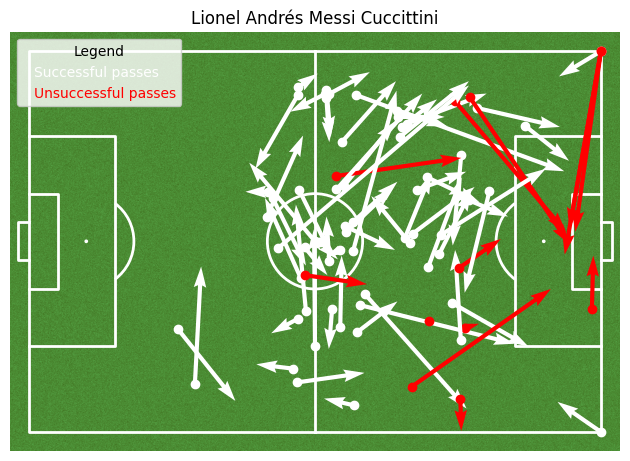

In [26]:
# Show passes for one player on one match

plot_passes_for_player(match=match2_passes, player='Lionel Andrés Messi Cuccittini')

#### Networkx analysis

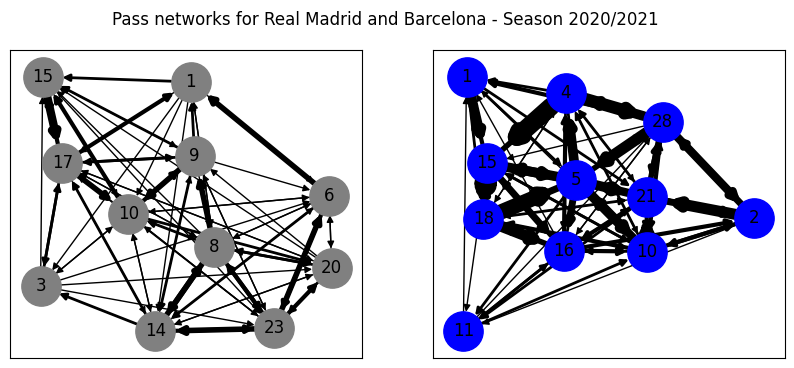

In [28]:
# Match 1 - Networks

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Get Graph for Team 1 at Match 1
G_team1_match1 = create_graph(passes_team1_match1)

edges = G_team1_match1.edges()
weights = [G_team1_match1[u][v]['weight'] for u, v in edges]

# Plot Graph
nx.draw_networkx(G_team1_match1, node_size=800, with_labels=True, node_color='gray', width = weights, ax=ax1)

# Get Graph for Team 2 at Match 1
G_team2_match1 = create_graph(passes_team2_match1)

edges = G_team2_match1.edges()
weights = [G_team2_match1[u][v]['weight'] for u, v in edges]

# Plot Graph
nx.draw_networkx(G_team2_match1, node_size=800, with_labels=True, node_color='blue', width = weights, ax=ax2)

plt.suptitle(f"Pass networks for {team1} and {team2} - Season {season}")
plt.show()

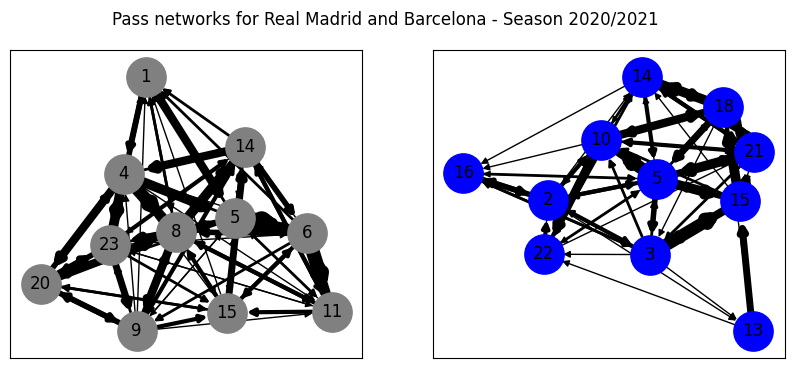

In [29]:
# Match 2 - Networks

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Get Graph for Team 1 at Match 2
G_team1_match2 = create_graph(passes_team1_match2)

edges = G_team1_match2.edges()
weights = [G_team1_match2[u][v]['weight'] for u, v in edges]

# Plot Graph
nx.draw_networkx(G_team1_match2, node_size=800, with_labels=True, node_color='gray', width = weights, ax=ax1)

# Get Graph for Team 2 at Match 1
G_team2_match2 = create_graph(passes_team2_match2)

edges = G_team2_match2.edges()
weights = [G_team2_match2[u][v]['weight'] for u, v in edges]

# Plot Graph
nx.draw_networkx(G_team2_match2, node_size=800, with_labels=True, node_color='blue', width = weights, ax=ax2)

plt.suptitle(f"Pass networks for {team1} and {team2} - Season {season}")
plt.show()

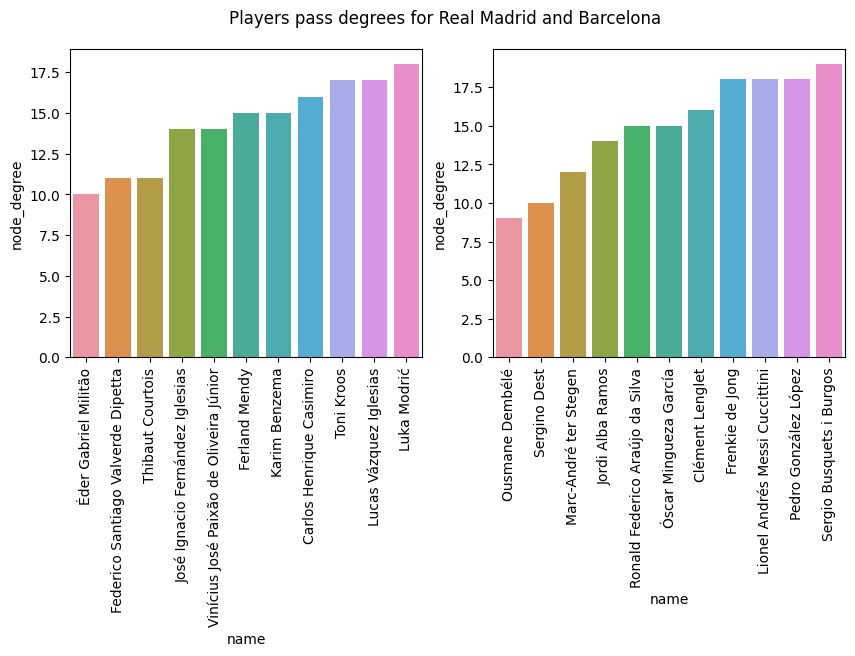

In [111]:
# Networkx analysis for G_team1_match1 and G_team2_match1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Node degree - Team 1
degrees_team1 = dict(nx.degree(G_team1_match1))
degrees_df_team1 = pd.DataFrame.from_dict(list(degrees_team1.items()))
degrees_df_team1.rename(columns = {0:'jersey_number', 1: 'node_degree'}, inplace = True)
name_list = [list(players_team1.keys())[list(players_team1.values()).index(str(num))] for num in degrees_df_team1['jersey_number']]
degrees_df_team1['name'] = name_list
degrees_df_team1 = degrees_df_team1.sort_values(by=['node_degree'])

sns.barplot(degrees_df_team1, x='name', y='node_degree', order=degrees_df_team1.sort_values('node_degree').name, ax=ax1)
ax1.set_xticklabels(degrees_df_team1['name'], rotation=90)

# Node degree - Team 2
degrees_team2 = dict(nx.degree(G_team2_match1))
degrees_df_team2 = pd.DataFrame.from_dict(list(degrees_team2.items()))
degrees_df_team2.rename(columns = {0:'jersey_number', 1: 'node_degree'}, inplace = True)
name_list = [list(players_team2.keys())[list(players_team2.values()).index(str(num))] for num in degrees_df_team2['jersey_number']]
degrees_df_team2['name'] = name_list
degrees_df_team2 = degrees_df_team2.sort_values(by=['node_degree'])
sns.barplot(degrees_df_team2, x='name', y='node_degree', order=degrees_df_team2.sort_values('node_degree').name, ax=ax2)
ax2.set_xticklabels(degrees_df_team2['name'], rotation=90)

plt.suptitle(f"Players pass degrees for {team1} and {team2}")
plt.show()